In [1]:
import re
import pandas as pd

In [3]:
path = '../data/sample_coco.txt'

lines = []
with open(path) as f:
    lines = f.readlines()

In [4]:
lines[:5]

['id: 0, height: 330, width: 1093, bbox:[69, 464, 312, 175],\n',
 'id: 1, height: 782, width: 439, bbox:[359, 292, 83, 199],\n',
 'id: 3, height: 645, width: 831, bbox:[297, 312, 267, 167],\n',
 'id: 34, height: 943, width: 608, bbox:[275, 112, 319, 290],\n',
 'id: 20, height: 593, width: 857, bbox:[71, 368, 146, 147],\n']

In [5]:
class my_dictionary(dict):
    def __init__(self):
        self = dict()
        
    def add(self, key, value):
        self[key] = value

In [6]:
def datarestructure(columns,dataList):
    ls = []
    dataDict = my_dictionary()
    for i in dataList:
        a = i.replace(',\n','')
        val = re.findall('[0-9]+', a)
        for cnt,dat in zip(columns,val):
            dataDict.add(cnt,dat)
        ls.append(dataDict.copy())
    return ls

In [7]:
columns = ['id', 'height', 'width', 'x', 'y', 'bbox_width', 'bbox_height']
data = pd.DataFrame(datarestructure(columns,dataList=lines))
data = data.astype(dtype=np.int64)

In [62]:
data.to_csv('./data/coco.csv',index=False)

In [8]:
data.head(10)

,id,height,width,x,y,bbox_width,bbox_height
0,0,330,1093,69,464,312,175
1,1,782,439,359,292,83,199
2,3,645,831,297,312,267,167
3,34,943,608,275,112,319,290
4,20,593,857,71,368,146,147
5,61,587,745,177,463,68,302
6,16,430,405,78,295,54,237
7,41,513,1179,105,497,379,321
8,75,638,842,192,142,398,248
9,12,746,877,345,441,370,181


In [19]:
import numpy as np

In [50]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [57]:
data['n_height'] = [x/x for x in data.height]
data['n_width'] = [x/x for x in data.width]
data['n_x'] = [x/y for x,y in zip(data.x,data.width)]
data['n_y'] = [x/y for x,y in zip(data.y,data.height)]
data['n_bbox_width'] = [x/y for x,y in zip(data.bbox_width,data.width)]
data['n_bbox_height'] = [x/y for x,y in zip(data.bbox_height,data.height)]

In [58]:
data.head()

,id,height,width,x,y,bbox_width,bbox_height,n_height,n_width,n_bbox_width,n_bbox_height,n_x,n_y
0,0,330,1093,69,464,312,175,1.0,1.0,0.285453,0.530303,0.063129,1.406061
1,1,782,439,359,292,83,199,1.0,1.0,0.189066,0.254476,0.817768,0.373402
2,3,645,831,297,312,267,167,1.0,1.0,0.321300,0.258915,0.357401,0.483721
3,34,943,608,275,112,319,290,1.0,1.0,0.524671,0.307529,0.452303,0.118770
4,20,593,857,71,368,146,147,1.0,1.0,0.170362,0.247892,0.082847,0.620573


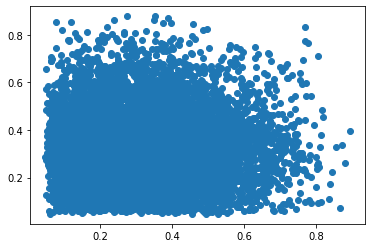

In [59]:
plt.scatter(data['n_bbox_width'],data['n_bbox_height'])

In [63]:
X = data[['n_bbox_width','n_bbox_height']]

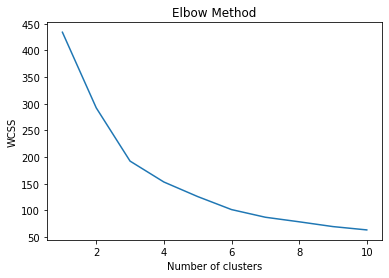

In [64]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

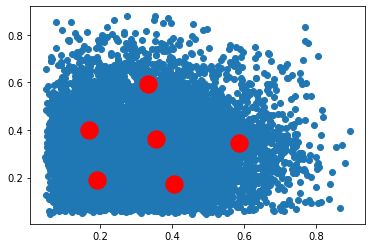

In [69]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X['n_bbox_width'], X['n_bbox_height'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [68]:
X['n_bbox_width']

0        0.285453
1        0.189066
2        0.321300
3        0.524671
4        0.170362
           ...   
10100    0.425455
10101    0.411765
10102    0.446617
10103    0.415008
10104    0.628684
Name: n_bbox_width, Length: 10105, dtype: float64

In [71]:
path

'../data/sample_coco.txt'

In [72]:
X.to_csv('../data/kmeans.csv',index=False)